---
title: "1.3-Probability Distributions"
author: "Ahmed Aredah"
date: "12.5.2023"
output: html_document
editor: visual
categories:
    Basic Probability theories
    
---

**Bayesian Networks**: Bayesian networks are graphical models that represent the probabilistic relationships among a set of variables. They are used for a variety of tasks, including classification, regression, and prediction. (below is a good example of a bayesian network) 
<p align="center">
<img src="../../data/bn1.png" width="40%" height="40%">
</p>


**Probabilistic Classifiers**: Probabilistic classifiers, like Naive Bayes classifiers, use probability theory to predict the likelihood of different outcomes. They are particularly useful for classification tasks where we need to estimate the probability of each class.

## Exploring Probabilities
To demonstrate these concepts, we will use a dataset from scikit-learn, a popular machine learning library in Python. We will calculate various probabilities and conditional probabilities to gain insights into our data.
We will use the Iris dataset, a classic dataset in machine learning. This dataset includes measurements of sepal length, sepal width, petal length, and petal width of 150 iris flowers from three different species.

## Probability Distribution
First, we will plot the probability distributions of each feature in the Iris dataset. This will help us understand the spread and central tendencies of these features.

## Conditional Probabilities
Conditional probability is the probability of an event occurring given that another event has already occurred. We will calculate the conditional probabilities for different combinations of features and iris species. For example, we might calculate the probability of an iris having a sepal length greater than 5 cm, given that it is of a particular species.


We will create visualizations to help understand these probabilities. Histograms and scatter plots can be particularly useful for this. These visualizations will provide insights into how different features are distributed and how they relate to the iris species.

In the following sections, we will implement these analyses using Python and scikit-learn, and discuss our findings. Stay tuned for a deep dive into the world of probabilities in machine learning!

Next, let's move on to implementing these concepts using Python and the Iris dataset from scikit-learn.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets

In [21]:
#| echo: false
# Set the background color to black and axis label color to white
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['legend.facecolor'] = 'white'

In [11]:
# Load the Iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# Convert target to actual species names for clarity
species_map = {i: species for i, species in enumerate(iris.target_names)}
iris_df['species'] = iris_df['target'].map(species_map)
iris_df.drop('target', axis=1, inplace=True)

# Display first few rows of the dataframe
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
iris_df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

We have successfully loaded the Iris dataset and prepared it for analysis. The dataset contains measurements of sepal length, sepal width, petal length, and petal width for 150 iris flowers, classified into three species: setosa, versicolor, and virginica.

Now, let's proceed to the first part of our analysis:

## Probability Distributions

We will plot the probability distributions of each feature (sepal length, sepal width, petal length, petal width) for the entire dataset. These plots will help us understand the distribution of each feature across all the iris flowers in our dataset.

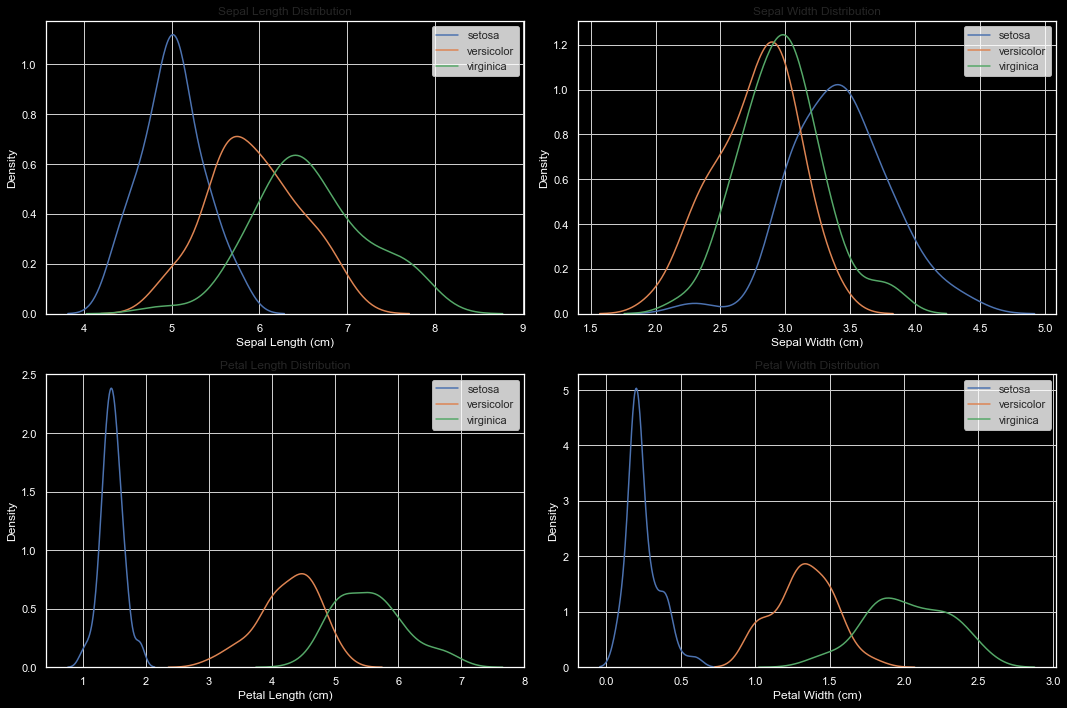

In [26]:
# Adjusting the layout to a 2x2 grid for the subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Sepal Length
for species in iris.target_names:
    subset = iris_df[iris_df['species'] == species]
    sns.kdeplot(subset['sepal length (cm)'], ax=axes[0, 0], label=f'{species}')
axes[0, 0].set_title('Sepal Length Distribution')
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Density')
axes[0, 0].legend()

# Sepal Width
for species in iris.target_names:
    subset = iris_df[iris_df['species'] == species]
    sns.kdeplot(subset['sepal width (cm)'], ax=axes[0, 1], label=f'{species}')
axes[0, 1].set_title('Sepal Width Distribution')
axes[0, 1].set_xlabel('Sepal Width (cm)')
axes[0, 1].set_ylabel('Density')
axes[0, 1].legend()

# Petal Length
for species in iris.target_names:
    subset = iris_df[iris_df['species'] == species]
    sns.kdeplot(subset['petal length (cm)'], ax=axes[1, 0], label=f'{species}')
axes[1, 0].set_title('Petal Length Distribution')
axes[1, 0].set_xlabel('Petal Length (cm)')
axes[1, 0].set_ylabel('Density')
axes[1, 0].legend()

# Petal Width
for species in iris.target_names:
    subset = iris_df[iris_df['species'] == species]
    sns.kdeplot(subset['petal width (cm)'], ax=axes[1, 1], label=f'{species}')
axes[1, 1].set_title('Petal Width Distribution')
axes[1, 1].set_xlabel('Petal Width (cm)')
axes[1, 1].set_ylabel('Density')
axes[1, 1].legend()

plt.tight_layout()
plt.show()


The probability distributions of the features in the Iris dataset are depicted in the plots above. These distributions provide insight into how the values of sepal length, sepal width, petal length, and petal width are spread across the dataset. Each plot includes a kernel density estimate (KDE), which gives a smooth estimate of the probability density function of the variable.

Next, we will delve into calculating conditional probabilities for different combinations of features and iris species. This will help us understand how the characteristics of iris flowers vary depending on their species.

Conditional probability is expressed as P(A|B), representing the probability of event A occurring given that B is true. In our case, we will calculate probabilities like P(Sepal Length > x | Species = y), which is the probability that the sepal length is greater than a certain value x given that the iris flower belongs to species y.

Let's start with an example: calculating the probability of sepal length being greater than 5 cm for each species.

The calculated conditional probabilities for the sepal length being greater than 5 cm, given each species of iris, are as follows:

In [32]:
# Define the threshold for sepal length
threshold = 5.0

# Calculating conditional probabilities
conditional_probs = {}
for species in iris_df['species'].unique():
    # Subset of data for the species
    subset = iris_df[iris_df['species'] == species]
    
    # Calculate the probability: P(Sepal Length > 5 | Species)
    prob = (subset['sepal length (cm)'] > threshold).mean()
    conditional_probs[species] = prob

conditional_probs

{'setosa': 0.44, 'versicolor': 0.94, 'virginica': 0.98}

- Setosa: There is a 44% probability that a Setosa iris has a sepal length greater than 5 cm.

- Versicolor: There is a 94% probability that a Versicolor iris has a sepal length greater than 5 cm.

- Virginica: There is a 98% probability that a Virginica iris has a sepal length greater than 5 cm.

These probabilities demonstrate the variation in sepal length across different species. While the majority of Versicolor and Virginica species have sepal lengths greater than 5 cm, the Setosa species tends to have shorter sepals on average.

This kind of analysis is crucial in understanding the distribution of features within each species and can be particularly useful in classification tasks in machine learning, where distinguishing between different classes based on feature probabilities is essential.

To illustrate the conditional probabilities we calculated, we can create a bar plot. This plot will show the probability of the sepal length being greater than 5 cm for each species of iris. A bar plot is an effective way to visually compare these probabilities across different species. Let's create this plot.

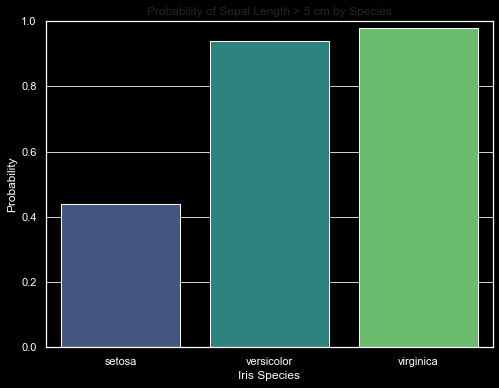

In [34]:
# Converting the conditional probabilities to a DataFrame for plotting
prob_df = pd.DataFrame(list(conditional_probs.items()), columns=['Species', 'Probability'])

# Creating the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Species', y='Probability', data=prob_df, palette="viridis")
plt.title('Probability of Sepal Length > 5 cm by Species')
plt.ylabel('Probability')
plt.xlabel('Iris Species')
plt.ylim(0, 1)  # Setting the y-axis limits to show probabilities clearly
plt.show()

The bar plot above illustrates the conditional probabilities of each iris species having a sepal length greater than 5 cm.

In conclusion, our exploration of probability theory and conditional probabilities using the Iris dataset from scikit-learn has demonstrated the importance of these concepts in machine learning. We've seen how understanding probability distributions and conditional probabilities can provide deep insights into data, aiding in more informed decision-making and better model development. Whether it's distinguishing between different iris species based on sepal length or applying these principles to more complex datasets, the fundamentals of probability theory remain a critical tool in the data scientist's toolkit. This journey underscores the value of a strong foundation in probability theory for anyone venturing into the field of machine learning.